# Large data processing and visualization project

## Review

You are planning to watch a movie. Can you trust online movie ratings and reviews? *Especially* if the company that deals with ratings and reviews *also* makes money selling movie tickets. Do these companies tend to over- or under-rate?

### Objective of the project:

**The goal of the project is to follow the steps from the fivethirtyeight.com article on ratings and see if we can come to the same conclusions as the article. Pandas skills and data visualization skills will be used to determine if Fandango provided inflated ratings in 2015 in order to sell more tickets.**

**The article based on which the project is being built: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**


---
----

## Part 1: Explore the data


### Data

The source data for the article [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) is freely available at the following github link: https://github.com/fivethirtyeight/data. Это два csv-файла. These are two csv files. One file contains rating data from Fandango, and the other file contains aggregated rating data from other companies such as Metacritic, IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

The `all_sites_scores.csv` file contains all films that have a Rotten Tomatoes rating, an RT User rating, a Metacritic rating, a Metacritic User rating, and an IMDb rating, and at least 30 Fandango fan reviews. The Fandango data was uploaded on August 24, 2015.

Column | Definition
--- | -----------
FILM | Movie title
RottenTomatoes | Rotten Tomatoes Tomatometer rating for this movie
RottenTomatoes_User | Rotten Tomatoes user rating for this movie
Metacritic | Metacritic rating for this movie
Metacritic_User | Metacritic user rating for this movie
IMDB | "IMDb user" rating for this movie
Metacritic_user_vote_count | The number of votes for this movie from Metacritic users
IMDB_user_vote_count | Number of votes for this movie from IMDb users

----
----

#### fandango_scape.csv

The movie `fandango_scrape.csv` contains data about movies downloaded from Fandango by the authors of the article.

Column | Definition
--- | ---------
FILM | Movie title
STARS | Number of stars on Fandango.com
RATING |  The Fandango rating is the value read from the HTML page. This is an average rating for a movie.
VOTES | The number of votes of users who wrote a review about the film (at the time of uploading the data).

----

**Import libraries that may need:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 2: Compare Fandango Ratings and Other User Ratings

Let's first examine Fandango's ratings and see if our analysis matches the findings in the article.

**Download fandango_scrape.csv file**

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

**Examine the properties of the resulting DataFrame object**

In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Let's study the relationship between the popularity of a film and its rating. Let's draw a scatterplot showing the relationship between the RATING and VOTES columns.**

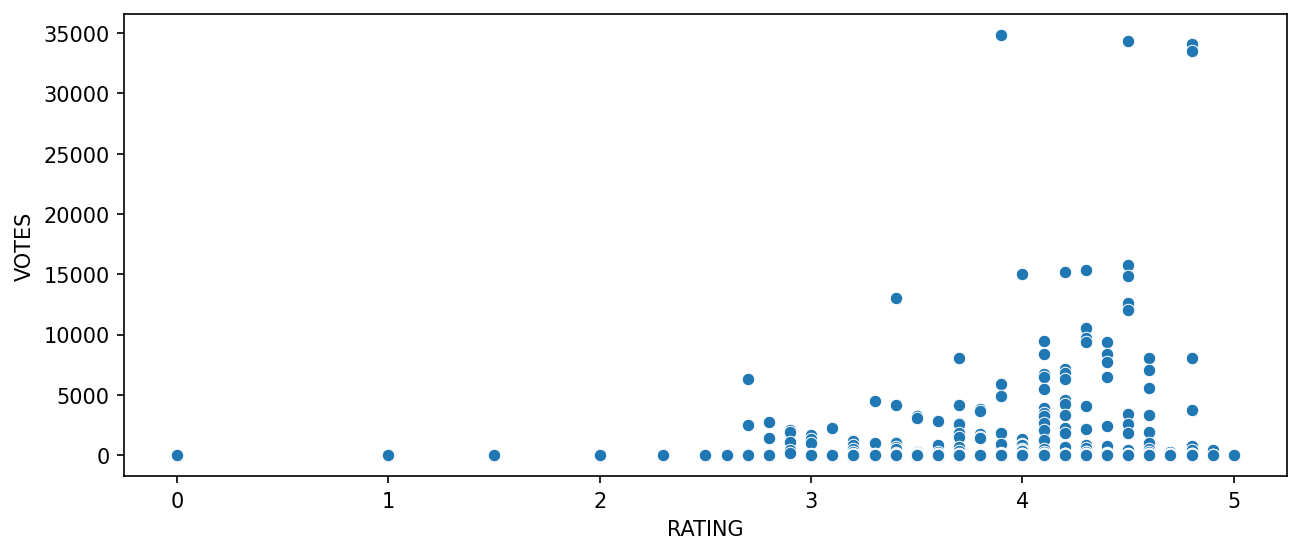

In [6]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='RATING',y='VOTES');

**Calculate correlation between columns:**

In [7]:
fandango.corr(numeric_only = True)

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Let's assume that each row in the FILM column contains a value in the following format:**

    Movie Title (Year)
    
**Let's create a new column, where we take only the year from the FILM row, and call this new column YEAR**

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

**How many films are in the Fandango dataset, broken down by year?**

In [9]:
fandango['YEAR'].value_counts()

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

**We visualize the number of films per year using a graph:**

<Axes: xlabel='YEAR', ylabel='count'>

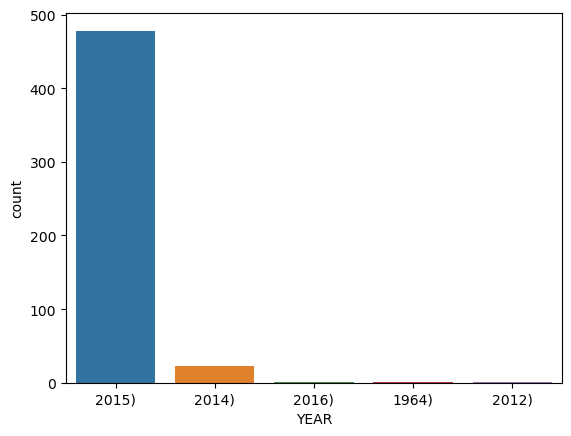

In [10]:
sns.countplot(data=fandango,x='YEAR')

**Which 10 films received the most votes?**

In [11]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


**How many films have zero votes?**

In [12]:
no_votes = fandango['VOTES']==0 
no_votes.sum()

69

**Let's create a DataFrame with only those movies that have votes (votes) - that is, delete those movies that don't have any votes.**

In [13]:
fan_reviewed = fandango[fandango['VOTES']>0]

----

**Due to the way star ratings are displayed on HTML pages, the actual user ratings may differ slightly from the ratings that are shown to the user. It is possible to visualize this difference in distributions.**

**Let's create a KDE plot that displays the distribution of displayed ratings (STARS) and true ratings based on user votes (RATING). Trim the KDE range within 0-5.**

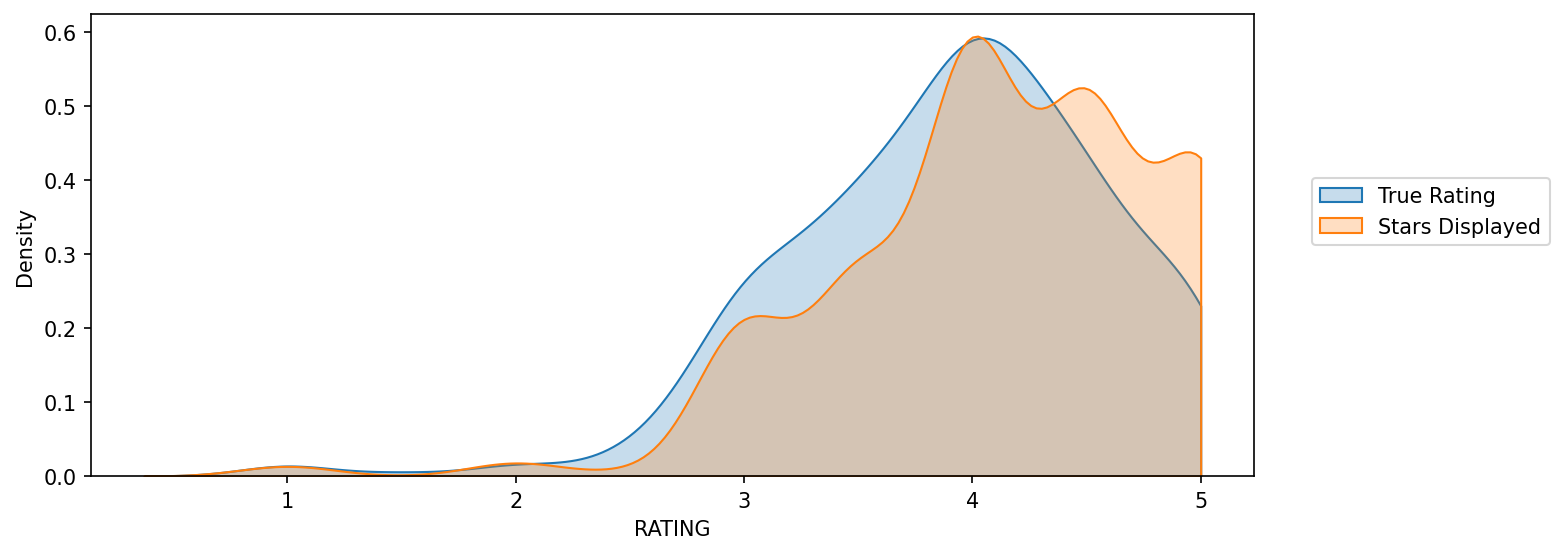

In [14]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

**Now let's calculate this difference in numerical form; Let's create a new column in which we store the difference between the STARS and RATING columns using the usual STARS-RATING subtraction, and also perform rounding to one decimal digit after the decimal point.**

In [15]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING'] 
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\37533\AppData\Local\Temp\ipykernel_6436\4022843895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
C:\Users\37533\AppData\Local\Temp\ipykernel_6436\4022843895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [16]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


**Let's draw a count plot to show how many times this or that value of the difference between STAR and RATING occurs:**

<Axes: xlabel='STARS_DIFF', ylabel='count'>

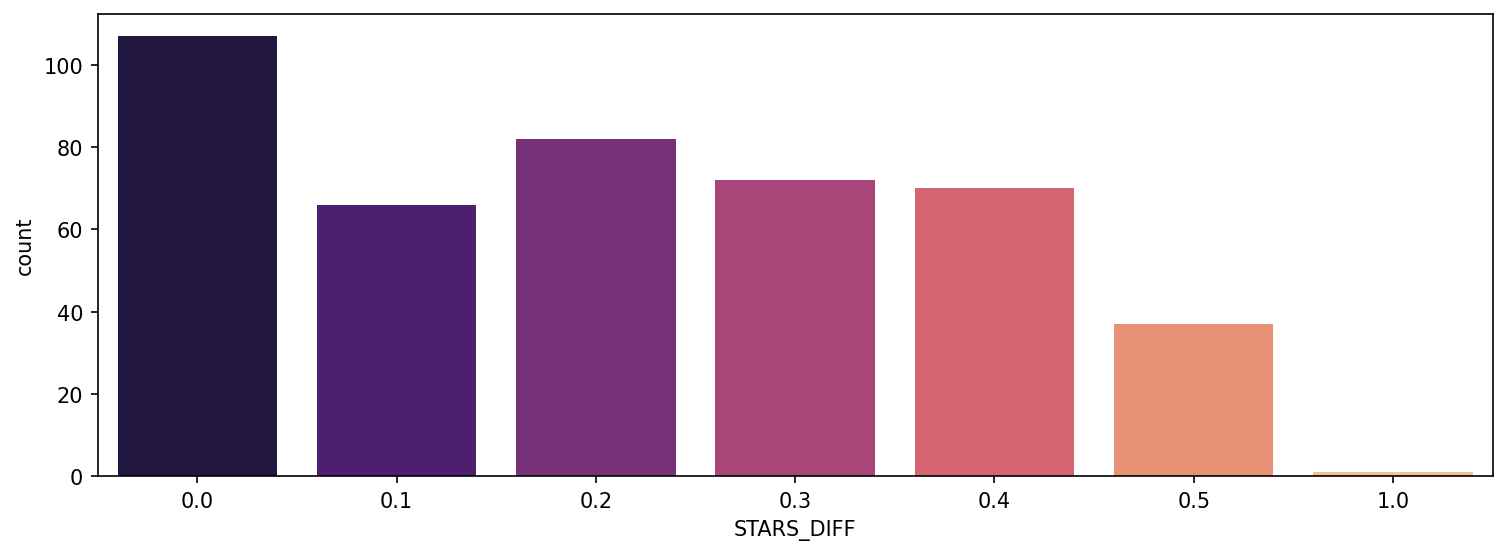

In [17]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')

**In this graph, we can see that one of the movies has a 1 star difference between the displayed rating and the true rating! Let's find this movie.**

In [18]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


## Part 3: Comparing Fandango Ratings to Other Companies

Let's see how Fandango's ratings compare with those of other companies.

**Upload the file "all_sites_scores.csv"**

In [19]:
all_sites = pd.read_csv("all_sites_scores.csv")

**Let's examine the general properties of the resulting DataFrame object.**

In [20]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [22]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Ratings from Rotten Tomatoes

Let's start with the Rotten Tomatoes ratings. There are two sets of ratings here - ratings published by official critics and user ratings.

**Let's draw a scatterplot plot for Rotten Tomatoes showing the relationship between critic ratings and user ratings.**

(0.0, 100.0)

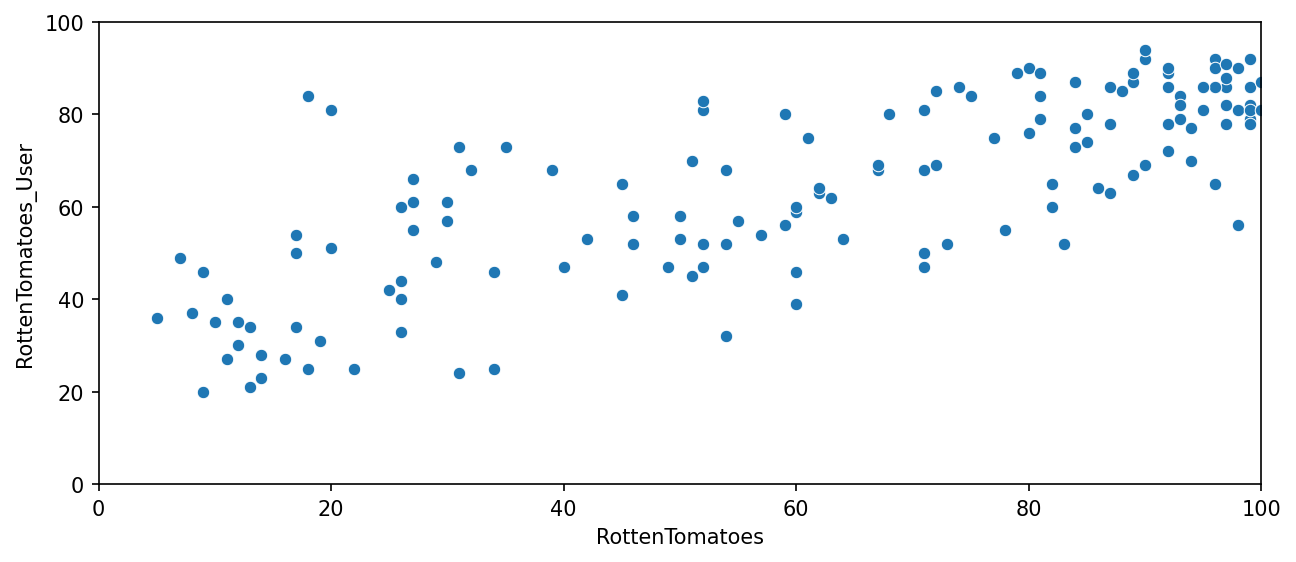

In [23]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

Let's study the numerical difference between these two ratings. Let's calculate this difference using the RottenTomatoes-RottenTomatoes_User formula. The resulting Rotten_Diff values ​​are the critic rating minus the user rating. Values ​​close to zero indicate that critics and users agree with each other. Large positive values ​​- when critics rated the film much higher than users. And large negative values - on the contrary, users rated the film much higher than critics.

**Let's create a new column that stores the difference between the critics rating and the user rating for Rotten Tomatoes. We use the formula RottenTomatoes-RottenTomatoes_User.**

In [24]:
all_sites['Rotten_Diff']  = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

Now let's calculate the average value of the obtained difference over the entire data set. Since the difference can be both positive and negative, we first take the absolute values of all values, and only after that we calculate the average value. This way we will get the average of the absolute difference between the ratings from critics and user ratings.

**Calculate the mean absolute difference between critic and user ratings for Rotten Tomatoes as described above.**

In [25]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Let's plot the distribution of the difference between critic and user ratings for Rotten Tomatoes. This graph will show negative values.**

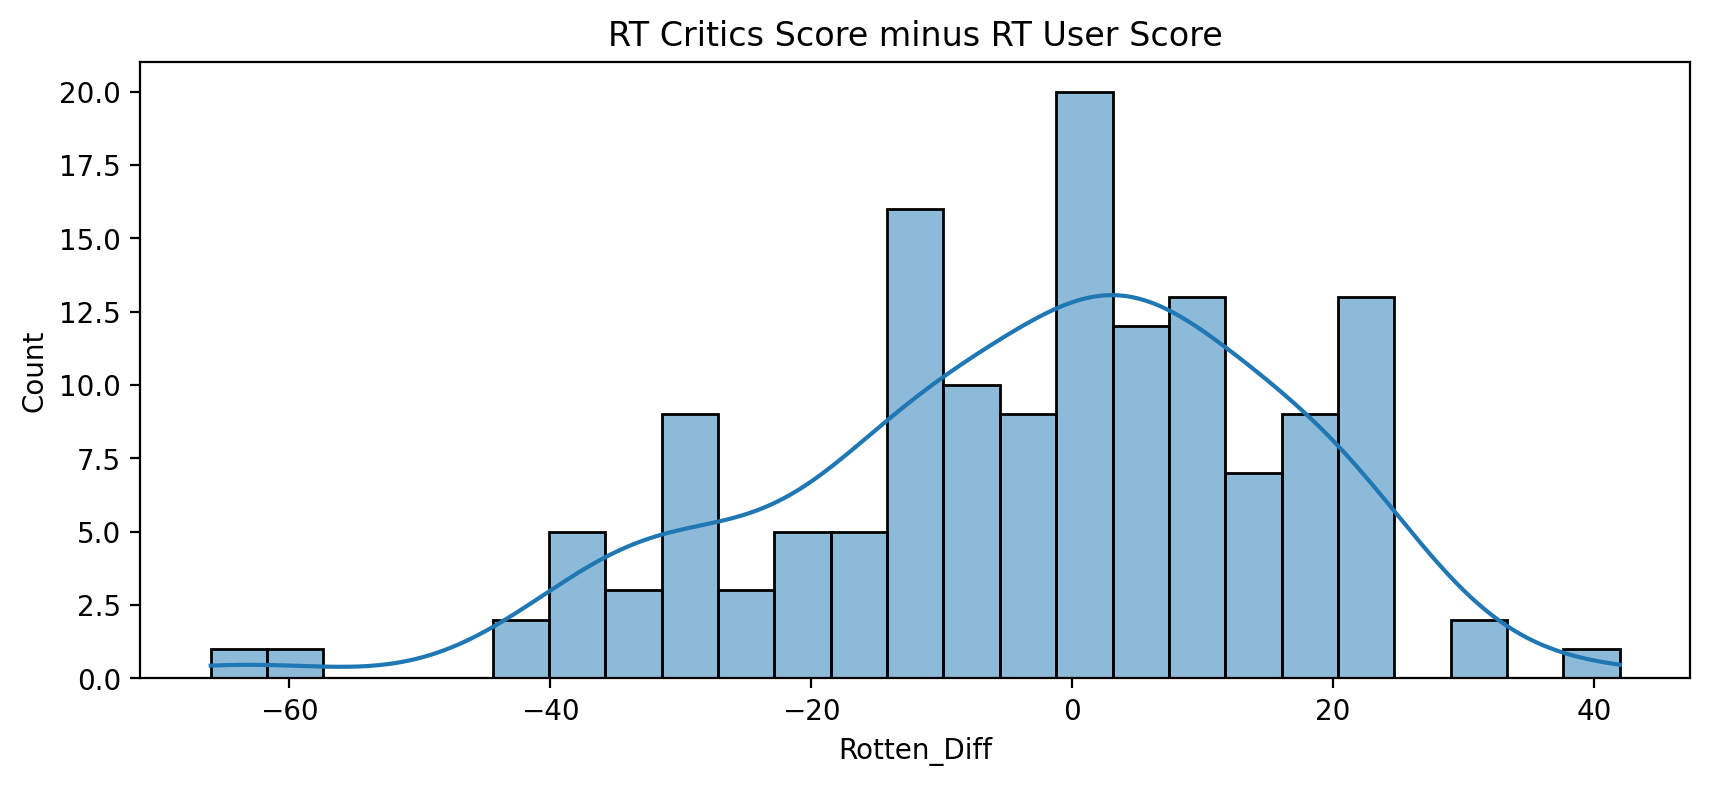

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

**Next, plot the *absolute* distribution of the difference between critic and user ratings for Rotten Tomatoes.**

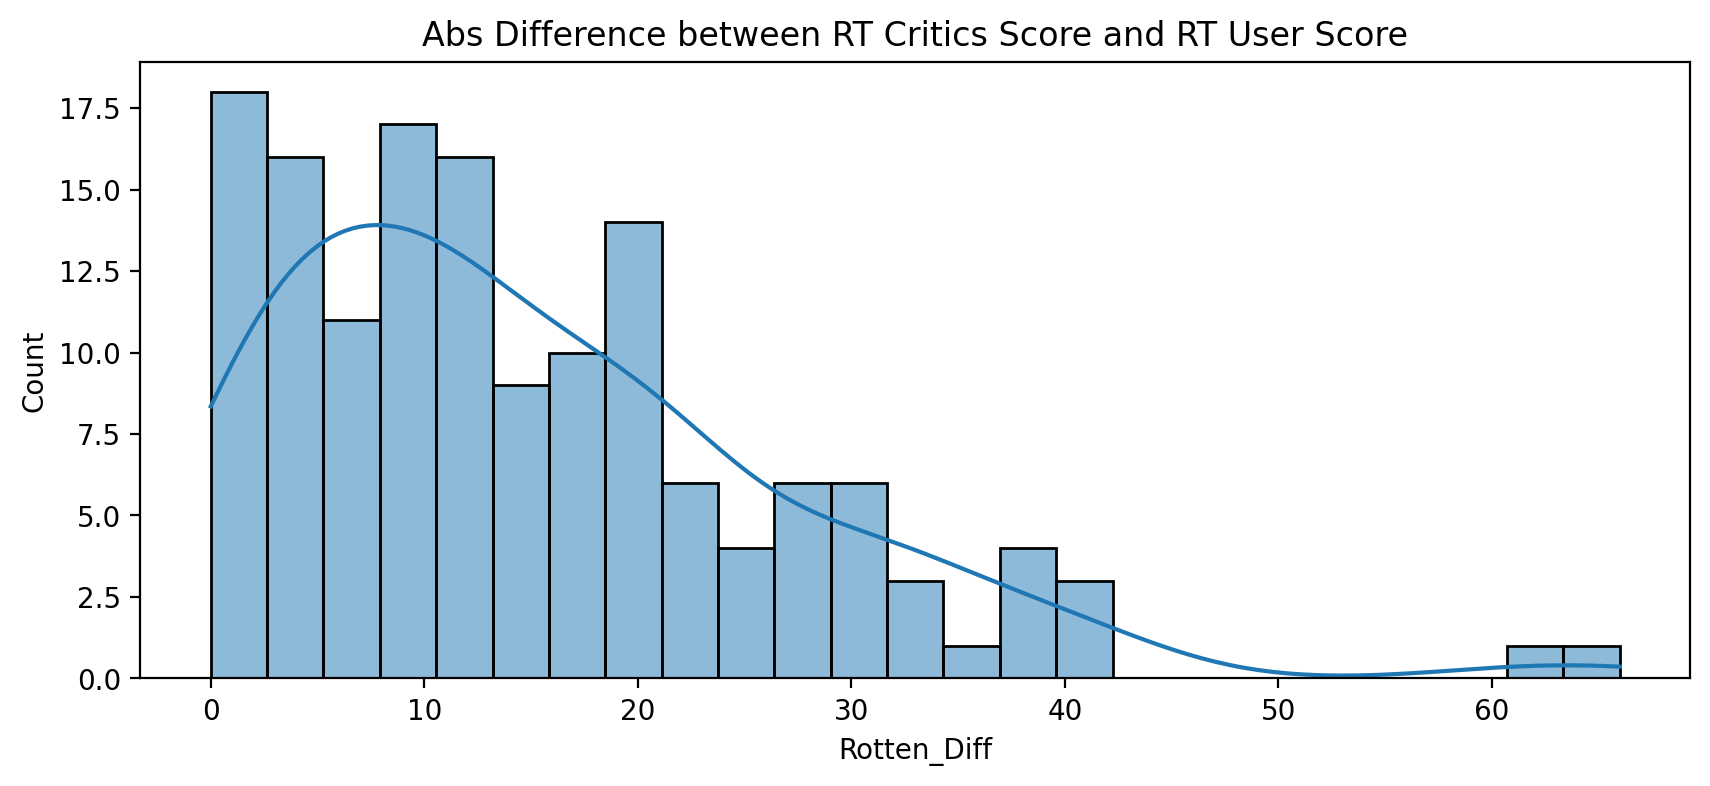

In [27]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

**Let's find out which films differ the most in ratings. First, let's display 5 films with the largest modulo *negative* difference in ratings. Since we calculated the difference in ratings using the formula Critics Rating - Users Rating, large negative values in modulus indicate that users, on average, rated these films much higher than critics.**

**What 5 films were rated the most on average by users, compared to critics' ratings:**

In [28]:
print("Users Love but Critics Hate")
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**Then vice versa - we will display 5 films that, on average, were rated the highest by critics, compared with ratings from users.**

In [29]:
print("Critics love, but Users Hate")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Ratings from MetaCritic

Next, take a look at the ratings from MetaCritic. They also display two types of ratings - both their official ratings and user ratings.

**Let's draw a scatterplot to compare Metacritic and Metacritic User ratings.**

(0.0, 10.0)

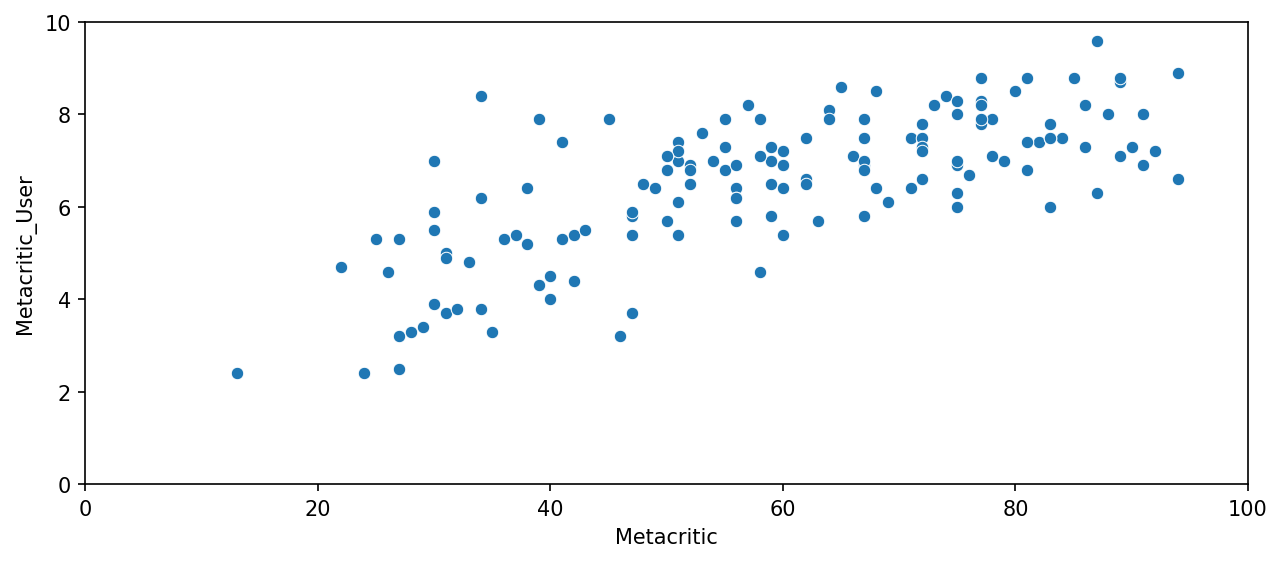

In [30]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

## Ratings from IMDB

And finally, let's look at the ratings from IMDB. Metacritic and IMDB show the number of votes. Let's look at the most popular films.

**Let's draw a scatterplot to show the relationship between the number of votes on MetaCritic and the number of votes on IMDB.**

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

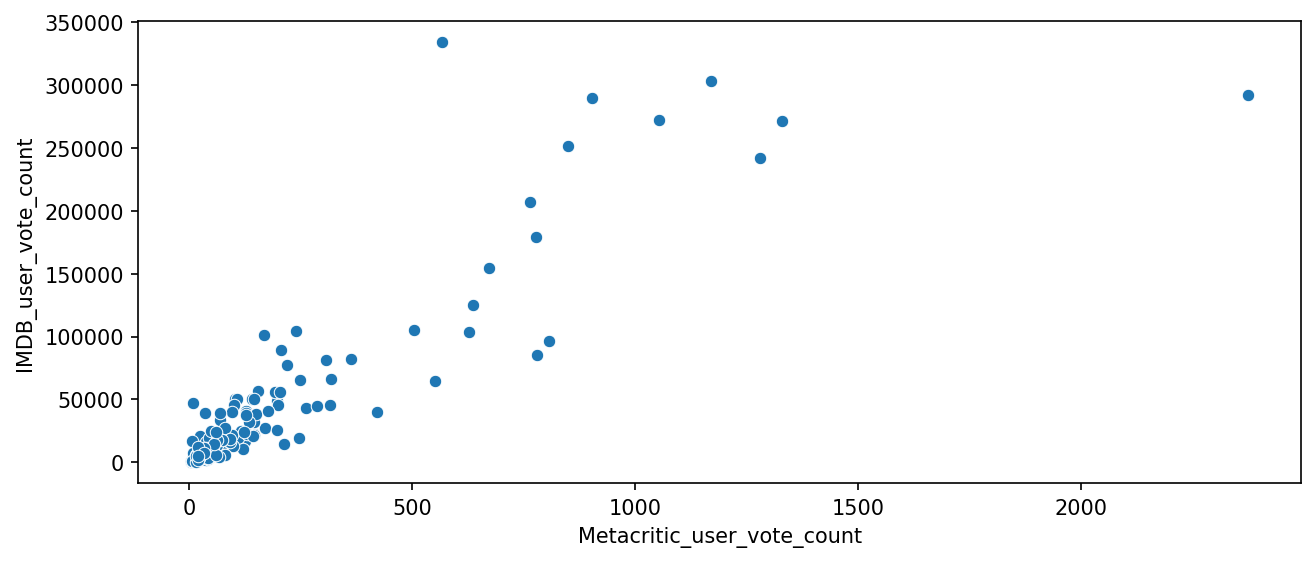

In [31]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

**Here we see two "outliers" - points that are very different from all other points. One film received the most votes on IMDB, but only 500 votes on Metacritic. What is this movie?**

**Which movie got the most votes on IMDB?**

In [32]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


**Which movie received the most votes on Metacritic?**

In [33]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Comparison of Fandango ratings with ratings of other companies

Let's finally find out if Fandango's ratings were artificially high in order to sell more tickets.

**Join the fandango table with the all_sites table. Not every movie in the Fandango table will be in the all_sites table because some Fandango movies have very few or no reviews. But we want to compare only those films that are in both tables. So let's do a "*inner* merge" of the two datasets, matching the rows on the FILM column.**

In [34]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [36]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


### Column normalization to range 0-5 according to Fandango's STARS and RATINGS columns

Rotten Tomatoes, Metacritic, and IMDB use a different rating scale than Fandango's 0 to 5 star scale. To make comparisons, you need to *normalize* these values ​​to fall within the range of 0 to 5 stars.

**Let's add additional columns to all_sites, and write normalized rating values from 0 to 5 in them.**

In [37]:
# ATTENTION - do not run this cell more than once, otherwise the division will be performed several times!
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] =  np.round(df['RottenTomatoes_User']/20,1)

In [38]:
# ATTENTION - do not run this cell more than once, otherwise the division will be performed several times!
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [39]:
# ATTENTION - do not run this cell more than once, otherwise the division will be performed several times!
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [40]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Next, we will create a DataFrame called norm_scores, in which we will leave only normalized ratings. We will also keep the STARS and RATING columns from the original fandango table.**

In [41]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [42]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparison of rating distributions from different companies


And now the moment of truth! Did Fandango really show unreasonably high ratings? We already know that the displayed RATING values were higher than the STARS values. But are the ratings themselves, on average, higher than those of other companies?


**Let's draw a graph comparing the distributions of normalized ratings from all companies.**

p.s. Move legend on seaborn kdeplot plot: https://github.com/mwaskom/seaborn/issues/2280

In [43]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\37533\AppData\Local\Temp\ipykernel_6436\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


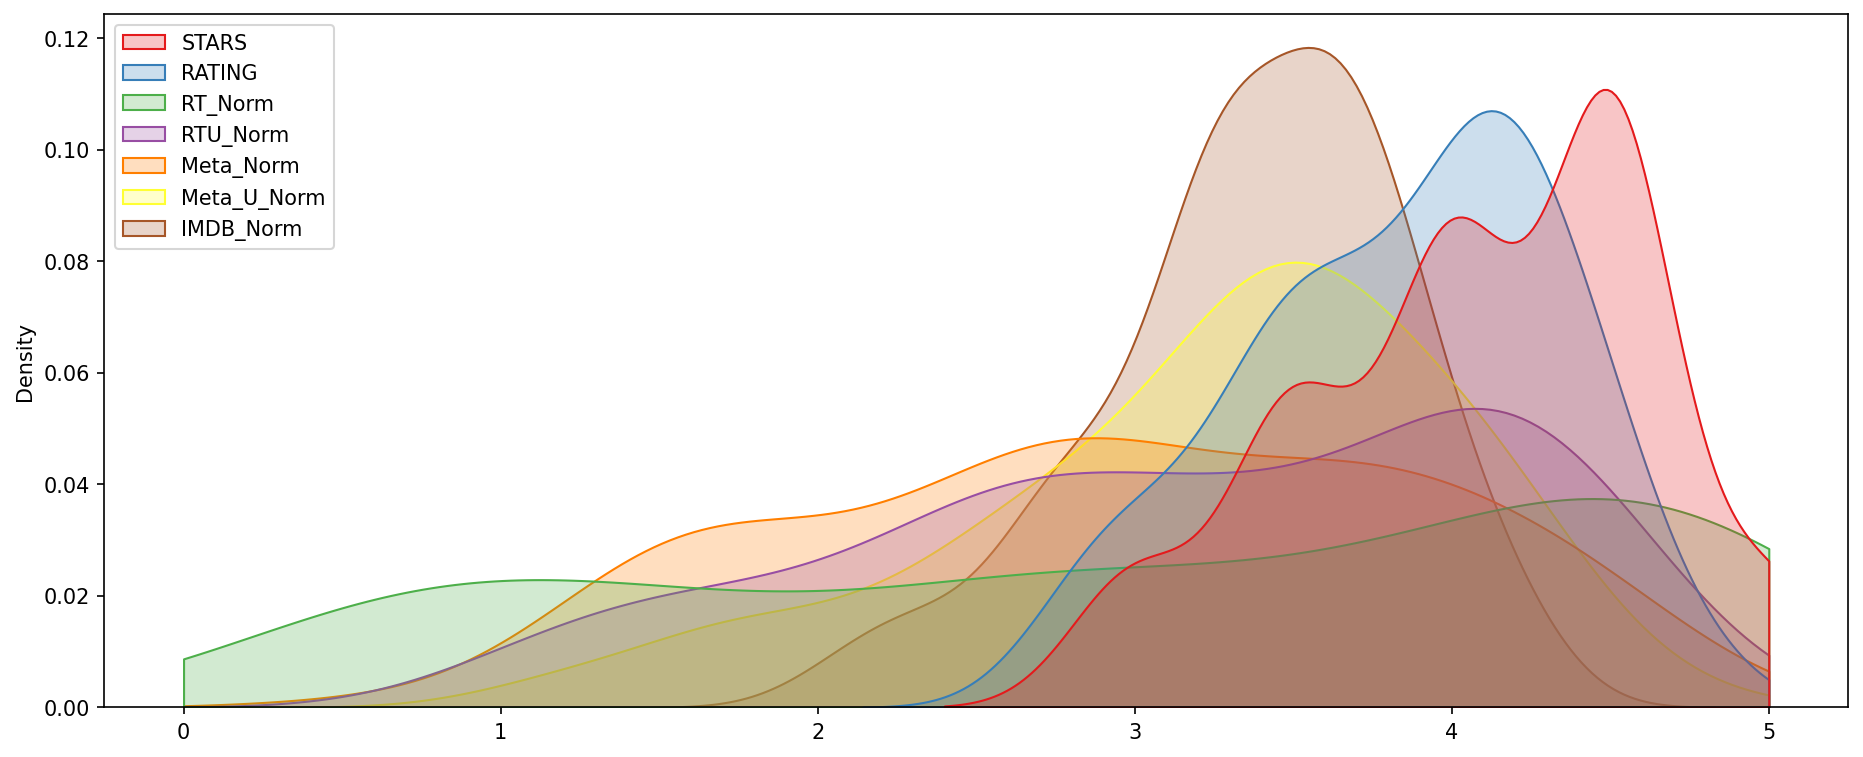

In [44]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],fill=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**We immediately see that Fandango's ratings are very shifted to the right. It is also interesting that RT ratings from critics have a very flat distribution. Let's compare only these two distributions.** 

**Let's draw a KDE plot comparing the distribution of Rotten Tomatoes ratings from critics and the distribution of STARS ratings from Fandango.**

C:\Users\37533\AppData\Local\Temp\ipykernel_6436\191327130.py:3: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = old_legend.legendHandles


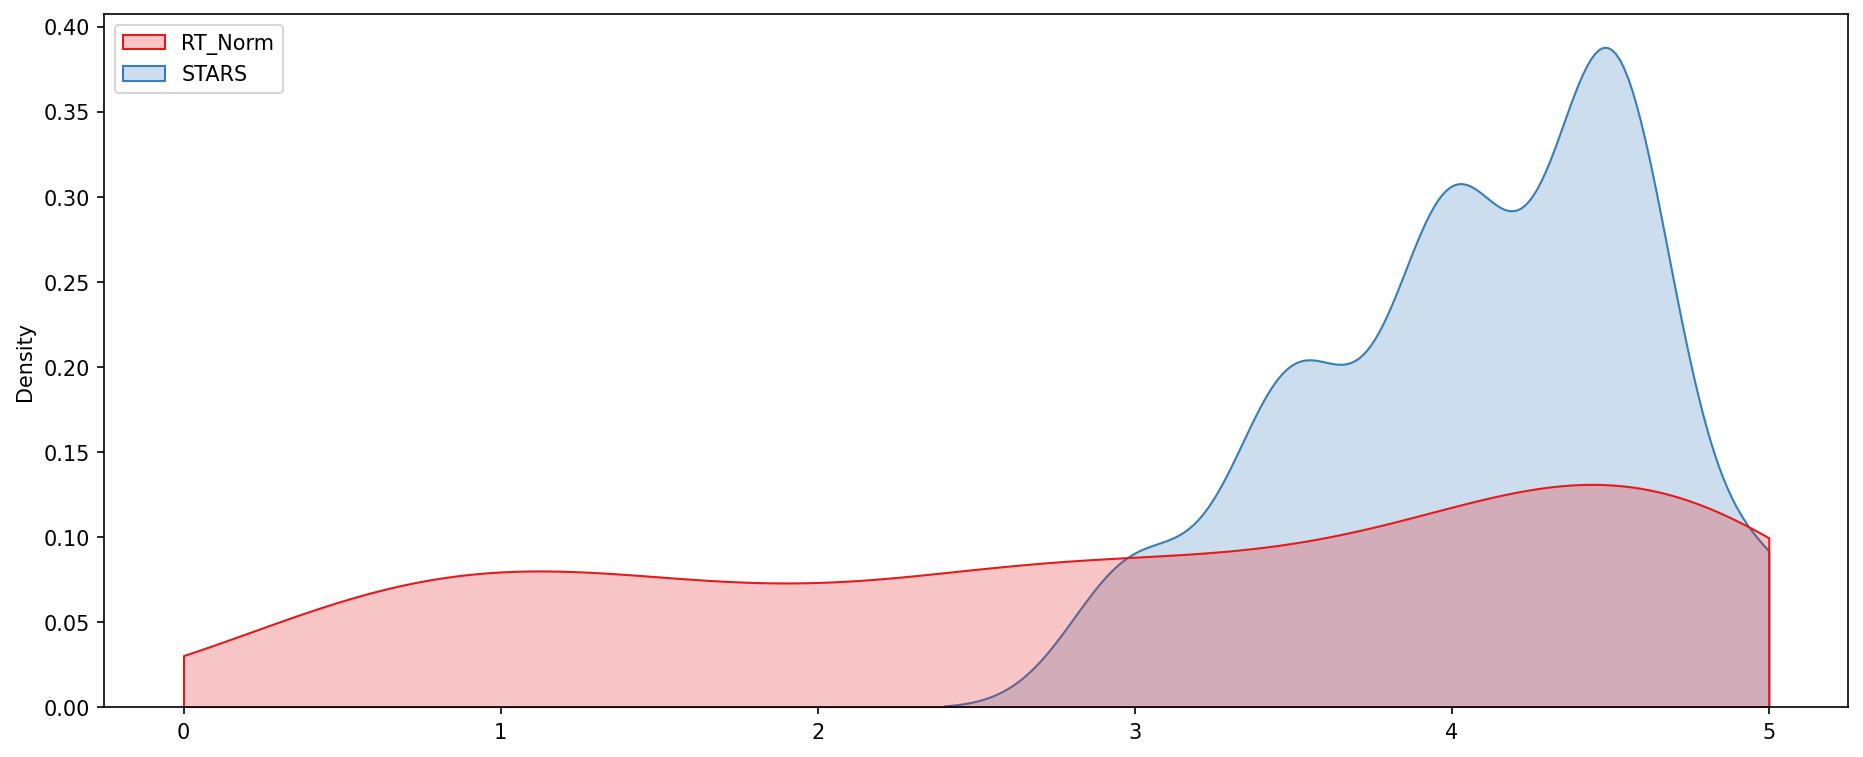

In [45]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],fill=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

**Let's draw a histplot plot comparing all normalized ratings.**

<Axes: ylabel='Count'>

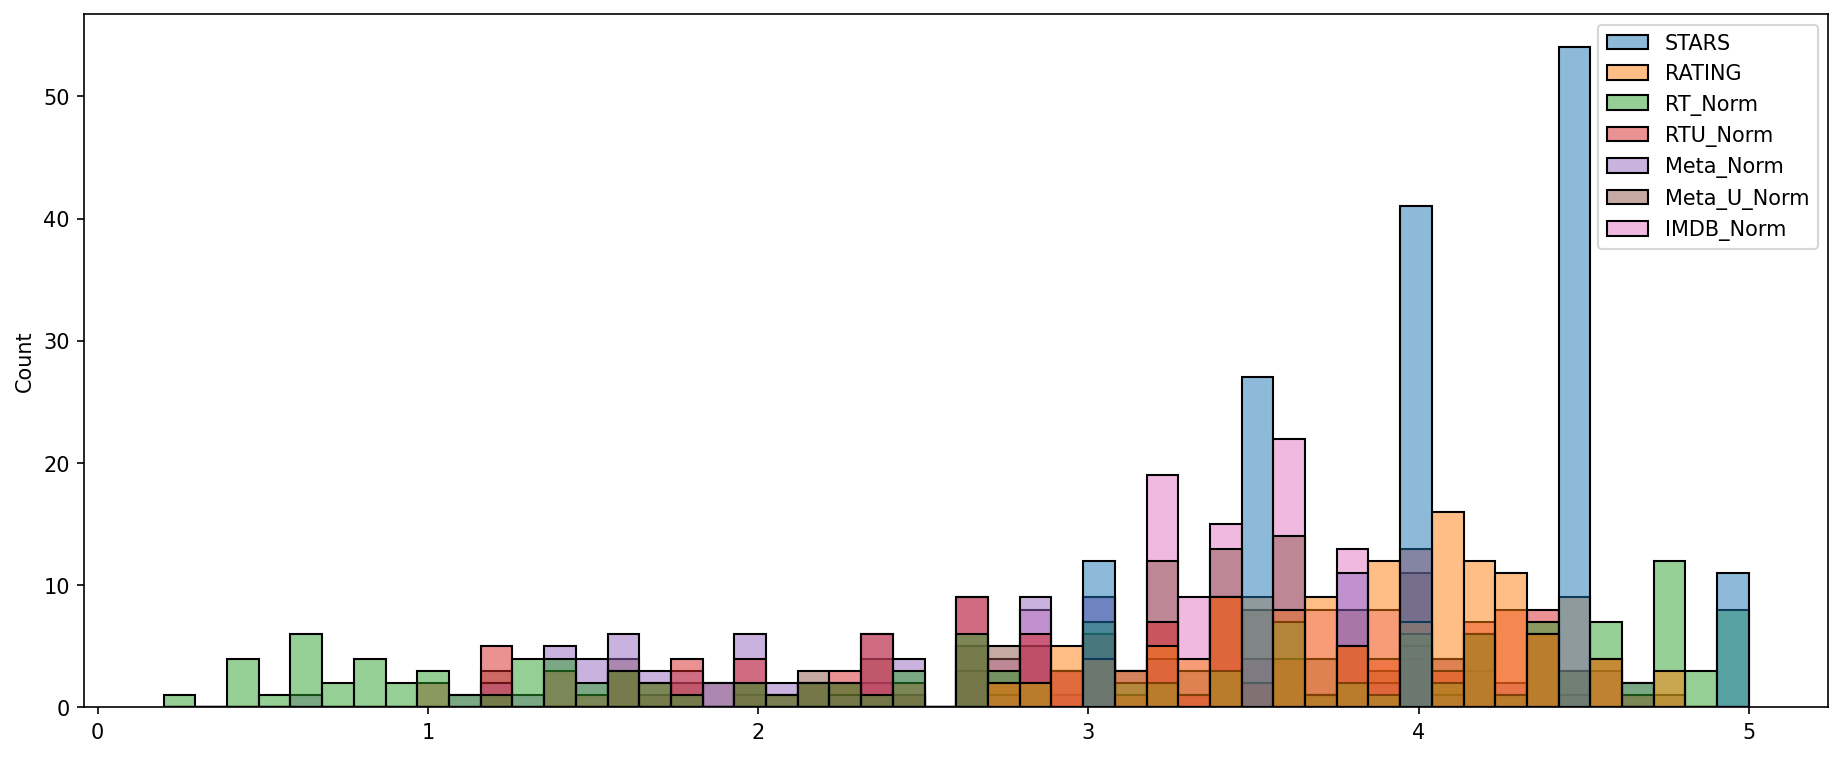

In [46]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50)


### How do different companies rate films with the lowest ratings?

**Let's draw a clustermap graph for all normalized ratings.**

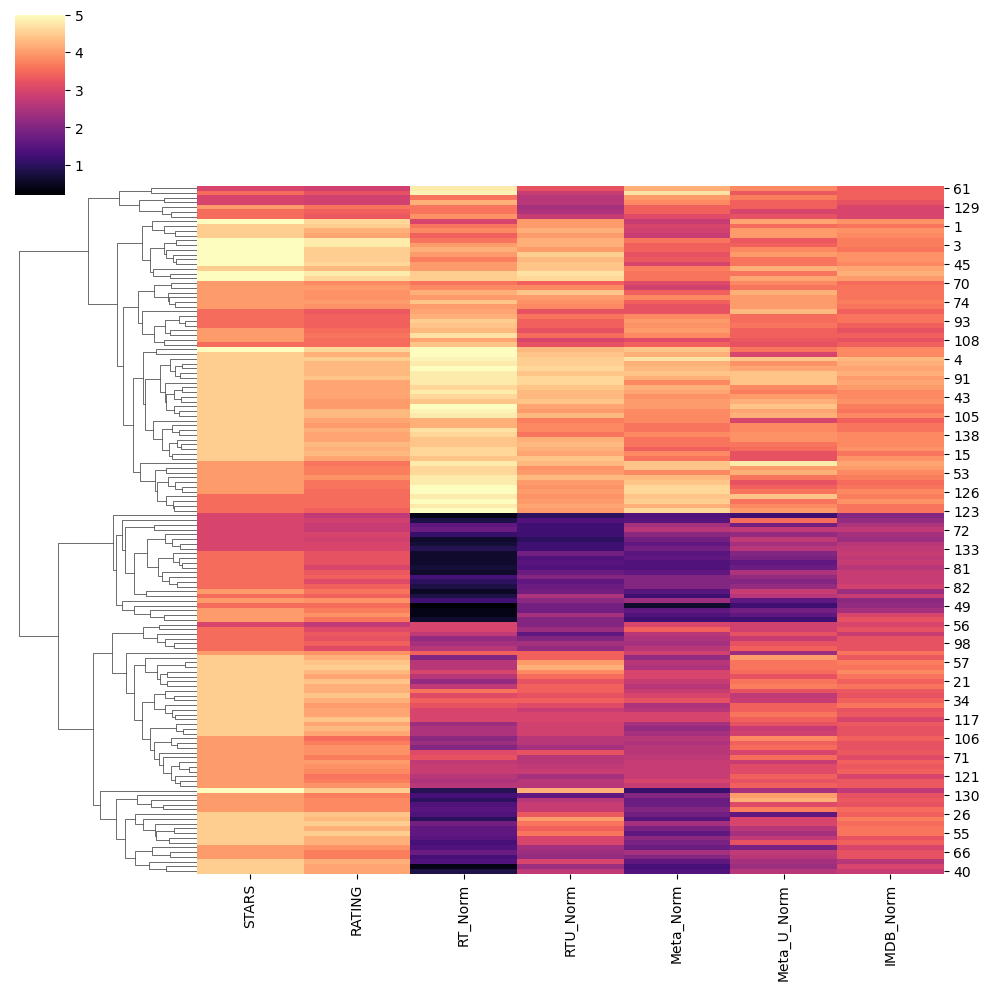

In [47]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

**It is noticeable that the ratings of Fandango are clearly higher than the ratings of other companies, especially when looking at the ratings rounded up. Let's look at the 10 Worst Rated Movies by Rotten Tomatoes Critic - what are those 10 movies? What normalized ratings have other companies given these films?**

In [48]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [49]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**We visualize the distribution of ratings from all companies for the 10 films with the worst ratings.**

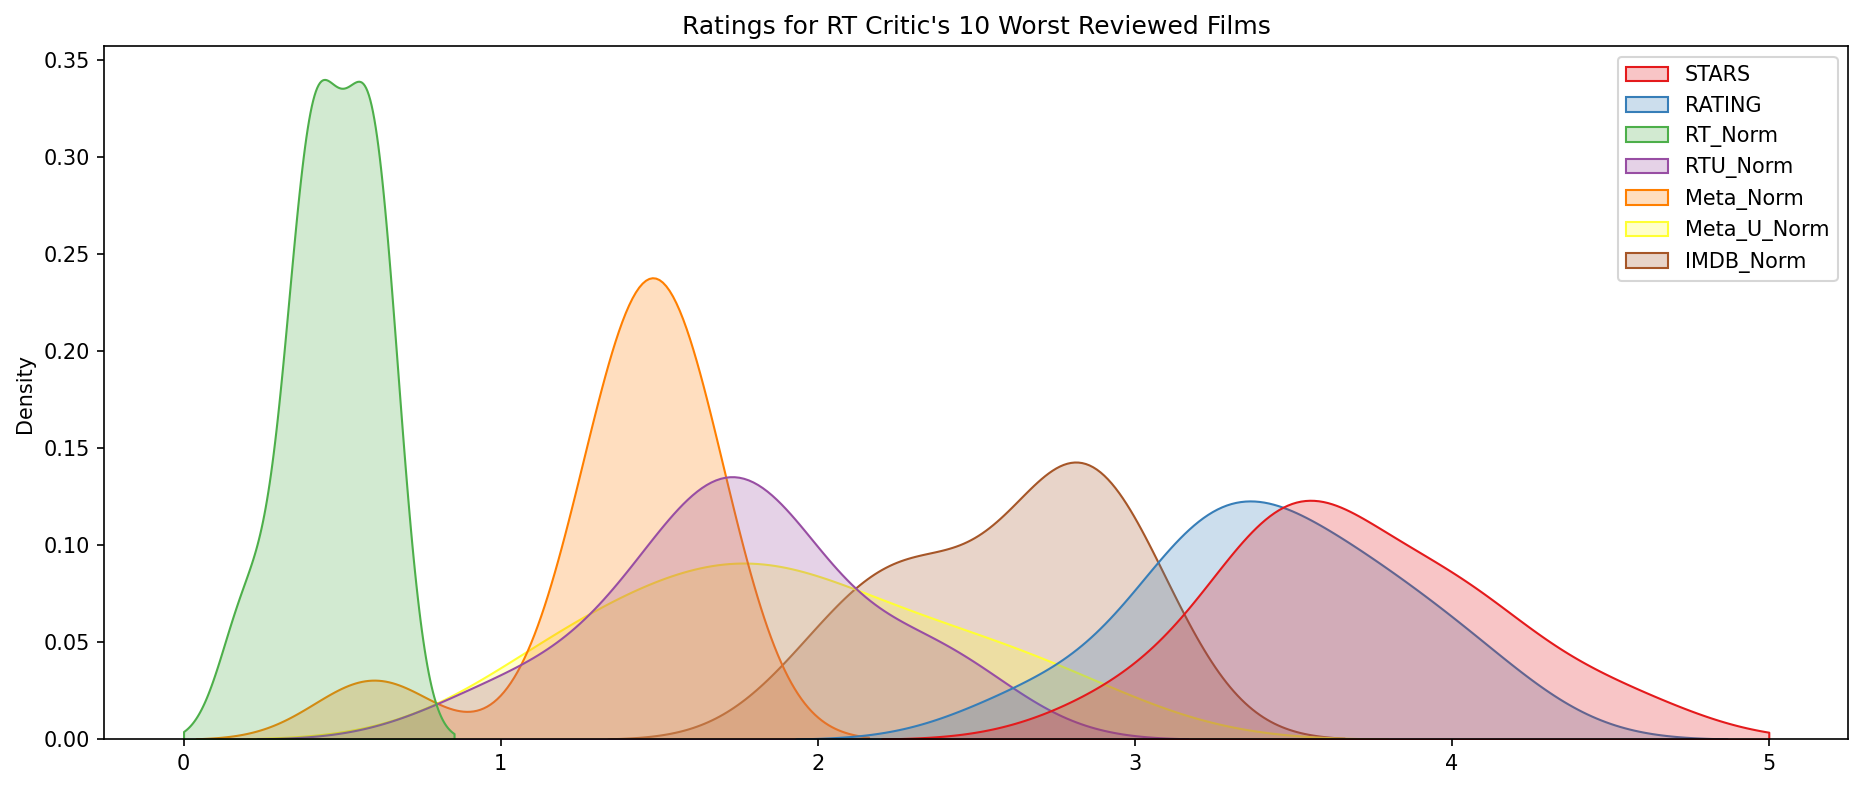

In [50]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],fill=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">
  
**Conclusions: wow! Fandango has shown 3-4 stars for movies that were obviously bad!**  
    
**The movie that stands out the most is [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0) - Fandango gave it a rating of 4.5 stars, although this movie received an [средний рейтинг 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) from other companies!**

In [51]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

----